# Chapter 7: Linear and Logistic Regression
## Computing the sum of squared errors
In this notebook, we visualize the sum of squared errors of a regression as a function of the weight parameters.

Programs from the book: [_Python for Natural Language Processing_](https://link.springer.com/book/9783031575488)

__Author__: Pierre Nugues

## Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

## The dataset

The data set: _Salammbô_ in French with three columns: the counts of characters, counts of _a_ and _e_

In [3]:
dataset = np.array([[36961, 2503, 4312],
                   [43621, 2992, 4993],
                   [15694, 1042, 1785],
                   [36231, 2487, 4158],
                   [29945, 2014, 3394],
                   [40588, 2805, 4535],
                   [75255, 5062, 8512],
                   [37709, 2643, 4229],
                   [30899, 2126, 3599],
                   [25486, 1784, 3002],
                   [37497, 2641, 4306],
                   [40398, 2766, 4618],
                   [74105, 5047, 8678],
                   [76725, 5312, 8870],
                    [18317, 1215, 2195]])

## The sum of the squared errors
We have $\hat{y} = mx + b$ and we compute $\sum (\hat{y} - y)^2$ for all the values of $m$ and $b$.

In [5]:
def sum_squared_errors(X: np.array, y: np.array, w: np.array) -> np.array:
    """
    Sum of the squared errors:
    Prediction: Xw = ŷ
    Error (loss): (y - ŷ)^2
    :param X: The input matrix: The predictors
    :param y: The output vector: The response
    :param w: The weight vector: The model
    :return: The error
    """
    v = y - X @ w
    return v @ v

## Computing the surfaces

We use a logathmic scale

In [6]:
def compute_3d_matrices(X: np.array, y: np.array):
    """
    Compute the 3D matrix of errors
    Axes x and y, the weights
    Axis z the error
    :param X:
    :param y:
    :return:
    """

    w0_range = np.linspace(-1000, 1000, 100)
    w1_range = np.linspace(0, 0.15, 100)
    x_axis, y_axis = np.meshgrid(w0_range, w1_range)
    z_axis = np.array([sum_squared_errors(X, y, np.array([w0, w1]))
                       for w0 in w0_range for w1 in w1_range])
    z_axis = np.log10(z_axis)
    print(x_axis.shape, z_axis.shape)
    z_axis = z_axis.reshape(x_axis.shape)
    return x_axis, y_axis, z_axis

## Plotting the surfaces

In [7]:
def plot(fig, ax, X, y, color):
    X, Y, Z = compute_3d_matrices(X, y)
    surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=color,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)

## Extracting the matrices

We extract the matrices and we pad them with a column of ones for the lintercept $w_0$

In [8]:
X_a, y_a = dataset[:, 0:1], dataset[:, 1]
X_e, y_e = dataset[:, 0:1], dataset[:, 2]

In [9]:
n_rows = dataset.shape[0]
n_rows

15

In [10]:
X_a = np.hstack((np.ones((n_rows, 1)), X_a))
X_e = np.hstack((np.ones((n_rows, 1)), X_e))

In [11]:
X_a

array([[1.0000e+00, 3.6961e+04],
       [1.0000e+00, 4.3621e+04],
       [1.0000e+00, 1.5694e+04],
       [1.0000e+00, 3.6231e+04],
       [1.0000e+00, 2.9945e+04],
       [1.0000e+00, 4.0588e+04],
       [1.0000e+00, 7.5255e+04],
       [1.0000e+00, 3.7709e+04],
       [1.0000e+00, 3.0899e+04],
       [1.0000e+00, 2.5486e+04],
       [1.0000e+00, 3.7497e+04],
       [1.0000e+00, 4.0398e+04],
       [1.0000e+00, 7.4105e+04],
       [1.0000e+00, 7.6725e+04],
       [1.0000e+00, 1.8317e+04]])

In [12]:
y_a

array([2503, 2992, 1042, 2487, 2014, 2805, 5062, 2643, 2126, 1784, 2641,
       2766, 5047, 5312, 1215])

## Showing the surfaces

In [13]:
import torch

In [14]:
l = torch.log10(torch.tensor([1363398784.0,
                              1256883456.0,
                              1152406400.0,
                              1051327872.0,
                              954626304.0]))

In [15]:
l

tensor([9.1346, 9.0993, 9.0616, 9.0217, 8.9798])

In [16]:
coords = torch.tensor([(-0.7489246129989624, 0.07533669471740723),
                       (-0.7383601069450378, 0.08590120822191238),
                       (-0.7305685877799988, 0.09369274228811264),
                       (-0.7233129739761353, 0.10094837099313736),
                       (-0.7160904407501221, 0.10817087441682816)])

In [17]:
coords

tensor([[-0.7489,  0.0753],
        [-0.7384,  0.0859],
        [-0.7306,  0.0937],
        [-0.7233,  0.1009],
        [-0.7161,  0.1082]])

In [18]:
coords[:, 0]

tensor([-0.7489, -0.7384, -0.7306, -0.7233, -0.7161])

In [19]:
X_a, y_a

(array([[1.0000e+00, 3.6961e+04],
        [1.0000e+00, 4.3621e+04],
        [1.0000e+00, 1.5694e+04],
        [1.0000e+00, 3.6231e+04],
        [1.0000e+00, 2.9945e+04],
        [1.0000e+00, 4.0588e+04],
        [1.0000e+00, 7.5255e+04],
        [1.0000e+00, 3.7709e+04],
        [1.0000e+00, 3.0899e+04],
        [1.0000e+00, 2.5486e+04],
        [1.0000e+00, 3.7497e+04],
        [1.0000e+00, 4.0398e+04],
        [1.0000e+00, 7.4105e+04],
        [1.0000e+00, 7.6725e+04],
        [1.0000e+00, 1.8317e+04]]),
 array([2503, 2992, 1042, 2487, 2014, 2805, 5062, 2643, 2126, 1784, 2641,
        2766, 5047, 5312, 1215]))

(100, 100) (10000,)
(100, 100) (10000,)


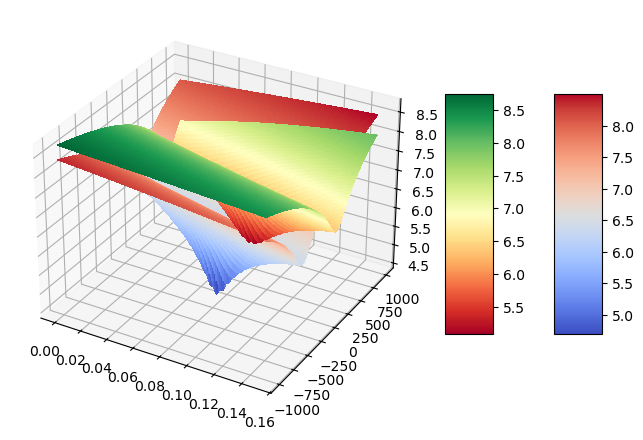

In [20]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# ax = fig.gca(projection='3d')

plot(fig, ax, X_a, y_a, plt.cm.coolwarm)
plot(fig, ax, X_e, y_e, plt.cm.RdYlGn)
# ax.scatter(coords[:, 0], coords[:, 1], l, c='red', marker='*')


plt.show()